# Fit with Orthogonal distance regression

Example from http://stackoverflow.com/questions/26058792/correct-fitting-with-scipy-curve-fit-including-errors-in-x/26085136#26085136

In [1]:
# manage data and fit
import pandas as pd
import numpy as np

# scipy ODR : orthogonal distance regression
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid")

In [2]:
def func(beta, x):
    y = beta[0]+beta[1]*x+beta[2]*x**3
    return y

## generate data

In [3]:
npts = 100
np.random.seed(160810)
x = np.linspace(-3, 2, npts)
y = func([-2.3, 7.0, -4.0], x)

sigma_x = .3
sigma_y = 2

# add some noise
x += np.random.normal(scale=sigma_x, size=100)
y += np.random.normal(scale=sigma_y, size=100)

## Define model

In [4]:
data = RealData(x, y, 0.3, 0.1)
model = Model(func)
odr = ODR(data, model, [1,0,0])

## Least squarre fit

In [5]:
odr.set_job(fit_type=0)
lsq_output = odr.run()
print("         stop reason:", lsq_output.stopreason)
print("              params:", lsq_output.beta)
print("                info:", lsq_output.info)
print("Sum of squares error:", lsq_output.sum_square)
print("             sd_beta:", lsq_output.sd_beta)
print("      sqrt(diag(cov):", np.sqrt(np.diag(lsq_output.cov_beta)))

# check convergence and run again the algorithm if it is not reached
if lsq_output.info != 1:
    print("\nRestart ODR till convergence is reached")
    i = 1
    while lsq_output.info != 1 and i < 100:
        print("restart %3d %12.7f" % (i, lsq_output.sum_square))
        lsq_output = odr.restart()
        i += 1
    print("         stop reason:", lsq_output.stopreason)
    print("              params:", lsq_output.beta)
    print("                info:", lsq_output.info)
    print("Sum of squares error:", lsq_output.sum_square)
    print("             sd_beta:", lsq_output.sd_beta)
    print("      sqrt(diag(cov):", np.sqrt(np.diag(lsq_output.cov_beta)))

         stop reason: ['Iteration limit reached']
              params: [-2.09368488  6.0257117  -2.54574759]
                info: 4
Sum of squares error: 5405.197746282522
             sd_beta: [ 0.22559351  0.80177874  0.95293199]
      sqrt(diag(cov): [ 0.03022085  0.1074075   0.12765622]

Restart ODR till convergence is reached
restart   1 5405.1977463
restart   2 4325.2070339
restart   3 1045.5356553
restart   4  743.3175690
restart   5  710.8233373
restart   6  682.0088933
restart   7  602.7134451
restart   8  578.8585227
restart   9  558.9136790
restart  10  539.9567887
restart  11  522.0568694
restart  12  505.0221792
restart  13  488.8286431
restart  14  473.3871052
restart  15  458.6550721
restart  16  444.5728008
restart  17  431.1303083
restart  18  418.2785524
restart  19  406.0148268
restart  20  394.2378398
restart  21  383.0217229
restart  22  372.3116187
restart  23  362.0182202
restart  24  352.2750168
restart  25  342.8414632
restart  26  333.9524660
restart  27  32

In [6]:
lsq_output.pprint()

Beta: [ -2.01039971  12.55629008  -6.06416408]
Beta Std Error: [ 0.48021907  0.89693549  0.49629295]
Beta Covariance: [[ 0.15433114  0.15842579 -0.04105628]
 [ 0.15842579  0.53839023 -0.21754393]
 [-0.04105628 -0.21754393  0.16483558]]
Residual Variance: 1.4942568100845495
Inverse Condition #: 0.037046778050718744
Reason(s) for Halting:
  Sum of squares convergence


## ODR fit

In [7]:
odr = ODR(data, model, [1,0,0])
odr.set_job(fit_type=2)
odr_output = odr.run()
print("         stop reason:", odr_output.stopreason)
print("              params:", odr_output.beta)
print("                info:", odr_output.info)
print("Sum of squares error:", odr_output.sum_square)
print("             sd_beta:", odr_output.sd_beta)
print("      sqrt(diag(cov):", np.sqrt(np.diag(odr_output.cov_beta)))

# check convergence and run again the algorithm if it is not reached
if odr_output.info != 1:
    print("\nRestart ODR till convergence is reached")
    i = 1
    while odr_output.info != 1 and i < 100:
        print("restart", i)
        odr_output = odr.restart()
        i += 1
    print("         stop reason:", odr_output.stopreason)
    print("              params:", odr_output.beta)
    print("                info:", odr_output.info)
    print("Sum of squares error:", odr_output.sum_square)
    print("             sd_beta:", odr_output.sd_beta)
    print("      sqrt(diag(cov):", np.sqrt(np.diag(odr_output.cov_beta)))

         stop reason: ['Sum of squares convergence']
              params: [-1.15111597  4.5357938  -3.34692538]
                info: 1
Sum of squares error: 821948.608722443
             sd_beta: [ 1.00126769  1.25522586  0.23236659]
      sqrt(diag(cov): [ 0.01087712  0.01363595  0.00252428]


## Plot

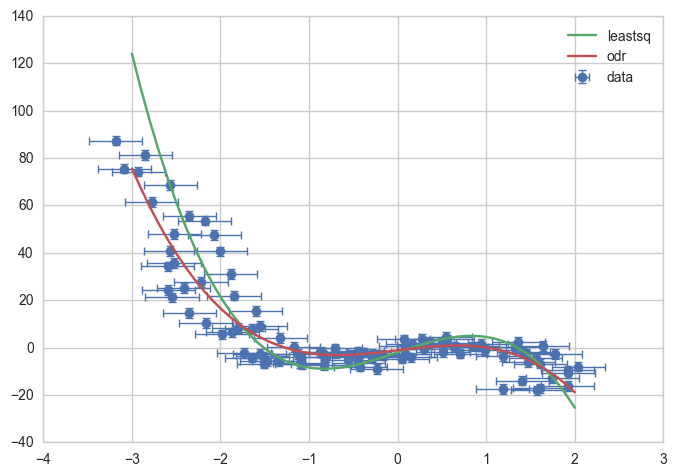

In [8]:
xn = np.linspace(-3, 2, 50)

plt.errorbar(x, y, marker="o", linestyle="", label="data", xerr=sigma_x, yerr=sigma_y, elinewidth=1, capthick=1)
plt.plot(xn, func(lsq_output.beta, xn), label='leastsq')
plt.plot(xn, func(odr_output.beta, xn), label='odr')
plt.legend()